In [2]:
import torch
import pandas as pd
import os
import matplotlib.pyplot as plt

# Read csv files in a folder and build training data set

In [4]:
Train_DIR = "C:/Users/ADMIN/Desktop/train"
Test_DIR = "C:/Users/ADMIN/Desktop/test"

In [6]:
# Practice lisdir function, which will get all the file names in this directory
os.listdir(Test_DIR)

['MotionData110000_001001_2017_11_23_16_49_48.csv',
 'MotionData110000_001001_2017_11_23_17_06_29.csv',
 'MotionData110000_001001_2017_11_23_17_21_44.csv',
 'MotionData110000_001001_2017_11_23_17_31_18.csv',
 'MotionData110000_001001_2017_11_23_17_39_07.csv',
 'MotionData110000_001001_2017_11_23_17_46_42.csv',
 'MotionData110000_001001_2017_11_23_17_56_53.csv',
 'MotionData110000_001001_2017_11_23_18_08_56.csv',
 'MotionData110000_001001_2017_11_23_18_19_22.csv',
 'MotionData110000_001001_2017_11_23_18_28_18.csv',
 'W_MotionData110000_001001_2017_11_23_16_58_13.csv',
 'W_MotionData110000_001001_2017_11_23_17_09_44.csv',
 'W_MotionData110000_001001_2017_11_23_17_25_42.csv',
 'W_MotionData110000_001001_2017_11_23_17_34_49.csv',
 'W_MotionData110000_001001_2017_11_23_17_42_53.csv',
 'W_MotionData110000_001001_2017_11_23_17_50_57.csv',
 'W_MotionData110000_001001_2017_11_23_18_00_32.csv',
 'W_MotionData110000_001001_2017_11_23_18_12_53.csv',
 'W_MotionData110000_001001_2017_11_23_18_23_15.

In [9]:
y1 = torch.FloatTensor([0,1]).view(1, 1, 2)
print(y1)


(0 ,.,.) = 
  0  1
[torch.FloatTensor of size 1x1x2]



In [10]:
y2 = torch.FloatTensor([0,1]).view(1, 1, 2)
y = torch.cat((y1, y2), 0)
print(y)


(0 ,.,.) = 
  0  1

(1 ,.,.) = 
  0  1
[torch.FloatTensor of size 2x1x2]



In [30]:
fileNo = 0
fnamelst = []
for fname in os.listdir(Train_DIR):
    if fname.endswith(".csv"):
        fnamelst.append(fname)
        fileNo = fileNo +1
        fname_with_path = Train_DIR + '/' + fname
        df = pd.read_csv(fname_with_path,usecols=[1, 2, 3])
        tensor = torch.FloatTensor(df[['AccX', 'AccY', 'AccZ']].values.tolist())
        tensor = tensor.view(1, 3000, 3)
        if(fileNo == 1):
            resultx = tensor
        else:
            resultx = torch.cat((resultx, tensor), 0)
        
        test = fname.split('_')
        if(test[0] == 'W'):
            y= torch.FloatTensor([0,1]).view(1, 1, 2)
        else:
            y= torch.FloatTensor([1,0]).view(1, 1, 2)
        if(fileNo == 1):
            resulty = y
        else:
            resulty = torch.cat((resulty, y), 0)

In [31]:
print(resultx.shape, resulty.shape)

torch.Size([81, 3000, 3]) torch.Size([81, 1, 2])


# Visualize the training data set

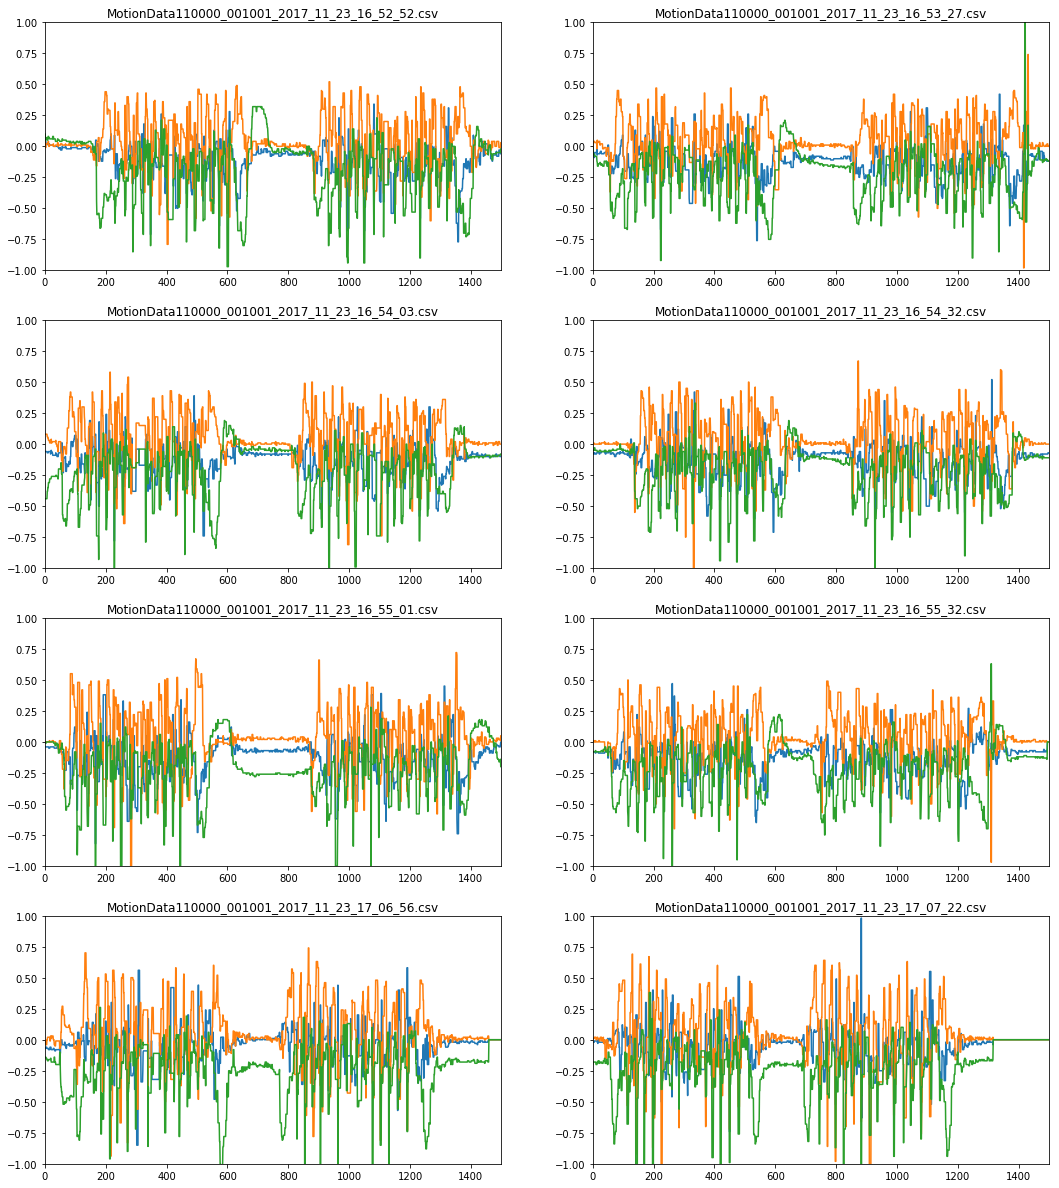

In [34]:
# plot the first 8 files
fig = plt.figure(figsize=(18, 21)) 
for i in range (0, 8):
    a=fig.add_subplot(4,2, i+1) # we have a 4 rows * 2 columns subplots
    plt.plot(resultx[i][:1500].numpy())
    plt.axis([0, 1500, -1, 1]) #minX, maxX, minY, maxY
    plt.title(fnamelst[i])
plt.show()